In this notebook, try to fit the model to other video clips than traj29.

In [1]:
import sys
sys.path.append('/Users/leah/Columbia/courses/19summer/SocialBehavior/SocialBehaviorptc')

In [2]:
from socialbehavior.models.hmm import HMM
from socialbehavior.observations.ar_sigmoid_normal_observation import ARSigmoidNormalObservation
from socialbehavior.distributions.sigmoidnormal import SigmoidNormal
from socialbehavior.transformations.linear import LinearTransformation
from socialbehavior.utils import find_permutation, random_rotation, k_step_prediction

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

from hips.plotting.colormaps import gradient_cmap, white_to_color_cmap
color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)

from tqdm import tqdm_notebook as tqdm
import sys
import time

from IPython.display import HTML

In [3]:
import joblib

datasets_processed = joblib.load('/Users/leah/Columbia/courses/19summer/SocialBehavior/tracedata/all_data_3_1')  # a list of length 30, each is a social_dataset

rendered_data = []
for dataset in datasets_processed:
    session_data = dataset.render_trajectories([3,8])  # list of length 2, each item is an array (T, 2). T = 36000
    rendered_data.append(np.concatenate((session_data),axis = 1)) # each item is an array (T, 4)
trajectories = np.concatenate(rendered_data,axis = 0)  # (T*30, 4)

traj29 = rendered_data[29]

In [4]:
def plot_2_mice(data):
    plt.plot(data[:,0], data[:,1], label='virgin')
    plt.plot(data[:,2], data[:,3], label='mother')
    plt.legend();

In [5]:
def plot_4_traces(data):
    plt.plot(data[:, 0], label='x1')
    plt.plot(data[:, 1], label='y1')
    plt.plot(data[:, 2], label='x2')
    plt.plot(data[:, 3], label='y2')
    plt.legend();

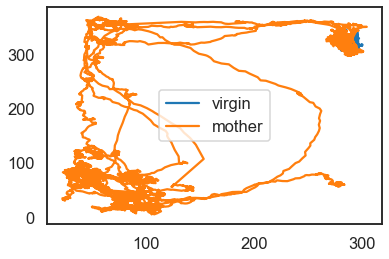

In [6]:
plot_2_mice(rendered_data[20])

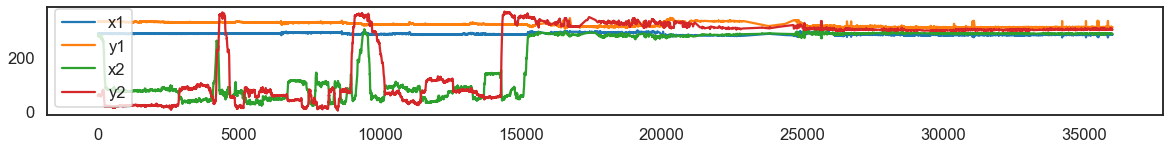

In [10]:
plt.figure(figsize=(20,2))
plot_4_traces(rendered_data[20])

Video clip 20: one is darting and the other one is in the nest.

In [48]:
arena_xmax = 320
arena_ymax = 370

In [49]:
K = 2
D = 4
T = rendered_data[20].shape[0]
bounds = np.array([[-10, arena_xmax + 10], [-10, arena_ymax + 10], [-10, arena_xmax + 10],
                   [-10, arena_ymax + 10]])


In [50]:
T

36000

In [51]:
np.random.seed(10)

torch.manual_seed(10)


tran = LinearTransformation(K=K, d_in=D, d_out=D)
observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=tran, bounds=bounds, alpha=0.5)

model = HMM(K=K, D=D, M=0, observation=observation)

data = torch.tensor(rendered_data[20], dtype=torch.float64)

In [52]:
model.log_likelihood(data)

tensor(-2.5921e+09, dtype=torch.float64, grad_fn=<HMMNormalizerCythonBackward>)

In [53]:
num_iters = 2000
pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer = torch.optim.Adam(model.params, lr=0.005)

losses = []
for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)
    loss.backward(retain_graph=True)
    optimizer.step()
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)
        
pbar.close()

In [54]:
num_iters = 2000
pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer = torch.optim.Adam(model.params, lr=0.001)

for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)
    loss.backward(retain_graph=True)
    optimizer.step()
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)
        
pbar.close()

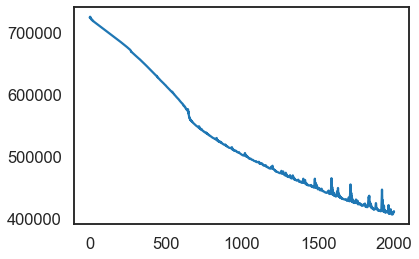

In [55]:
plt.plot(losses[2000:])

# check prediction

In [61]:
z = model.most_likely_states(data)
x_predict_arr = k_step_prediction(model, z, data)


([], <a list of 0 Text yticklabel objects>)

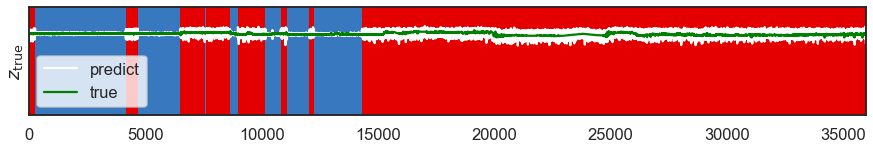

In [98]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr[:,0], label='predict', color='white')
plt.plot(data[:,0].numpy(), label='true', color='green')
plt.legend()
#plt.show()

lim = 1.2 * 320
plt.imshow(z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1, extent=(0, T, 0, lim))
plt.xlim(0, T)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

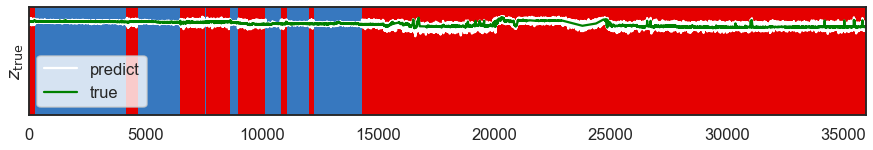

In [97]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr[:,1], label='predict', color='white')
plt.plot(data[:,1].numpy(), label='true', color='green')
plt.legend()
#plt.show()

lim = 1.2 * 320
plt.imshow(z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1, extent=(0, T, 0, lim))
plt.xlim(0, T)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

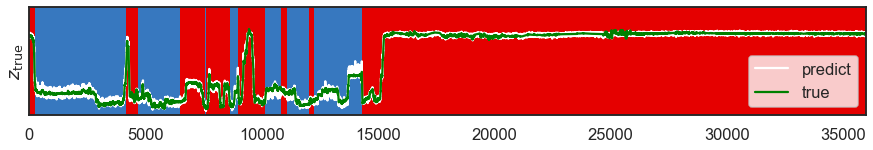

In [96]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr[:,2], label='predict', color='white')
plt.plot(data[:,2].numpy(), label='true', color='green')
plt.legend()
#plt.show()

lim = 1.2 * 320
plt.imshow(z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1, extent=(0, T, 0, lim))
plt.xlim(0, T)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

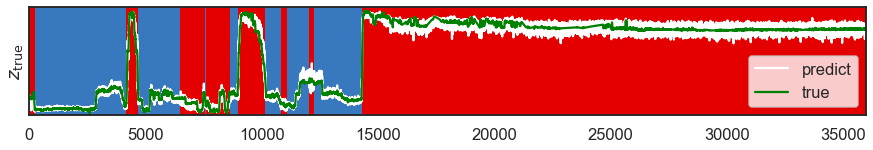

In [95]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr[:,3], label='predict', color='white')
plt.plot(data[:,3].numpy(), label='true', color='green')
plt.legend()
#plt.show()

lim = 1.2 * 320
plt.imshow(z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1, extent=(0, T, 0, lim))
plt.xlim(0, T)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

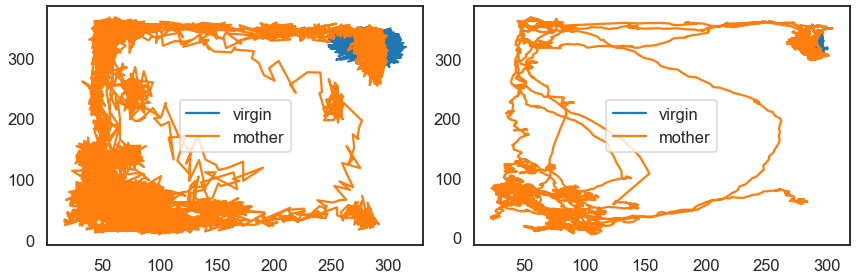

In [82]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_2_mice(x_predict_arr)

plt.subplot(1,2,2)
plot_2_mice(data.numpy())

plt.tight_layout()

In [65]:
[sum(z==k) for k in range(K)]

[9752, 26248]

# check samples

In [99]:
center = np.array([arena_xmax/2, arena_ymax/2, arena_xmax/2, arena_ymax/2])[None,]
prefix = (torch.tensor([1], dtype=torch.int), torch.tensor(center, dtype=torch.float64))

In [108]:
sample_z, sample_x = model.sample(20000)

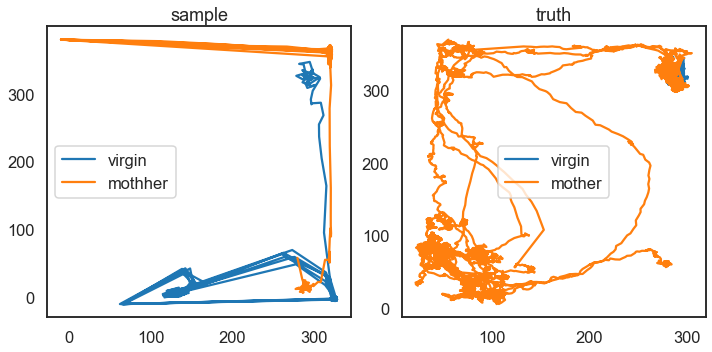

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(sample_x[:,0], sample_x[:,1], label='virgin')
axs[0].plot(sample_x[:,2], sample_x[:, 3], label='mothher')
axs[0].legend()
axs[0].set_title('sample')

axs[1].plot(data[:,0].numpy(), data[:,1].numpy(), label='virgin')
axs[1].plot(data[:,2].numpy(), data[:,3].numpy(), label='mother')
axs[1].legend()
axs[1].set_title('truth')

plt.tight_layout()

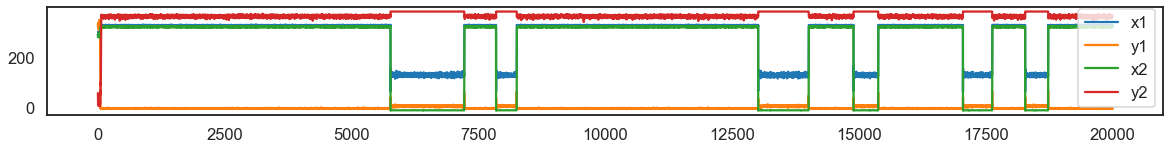

In [110]:
plt.figure(figsize=(20,2))
plot_4_traces(sample_x)

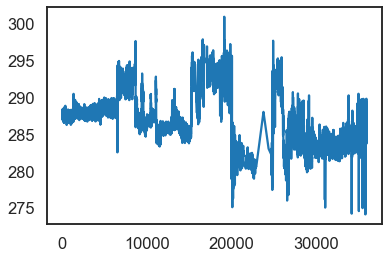

In [113]:
plt.plot(data[:,0].numpy())

# try separate training

In [115]:
bounds.shape

(4, 2)

In [116]:
tran_v = LinearTransformation(K=2, d_in=2, d_out=2)
observation_v = ARSigmoidNormalObservation(K=2, D=2, M=0, transformation=tran_v, bounds=bounds[:2], alpha=0.5)

model_v = HMM(K=2, D=2, M=0, observation=observation_v)

data_v = data[:, 0:2]

In [169]:
tran_m = LinearTransformation(K=2, d_in=2, d_out=2)
observation_m = ARSigmoidNormalObservation(K=2, D=2, M=0, transformation=tran_m, bounds=bounds[2:4], alpha=0.5)

model_m = HMM(K=2, D=2, M=0, observation=observation_m)

data_m = data[:, 2:4]

In [118]:
model_v.log_likelihood(data_v)

tensor(-2.9761e+09, dtype=torch.float64, grad_fn=<HMMNormalizerCythonBackward>)

In [170]:
model_m.log_likelihood(data_m)

tensor(-1.8568e+09, dtype=torch.float64, grad_fn=<HMMNormalizerCythonBackward>)

In [120]:
num_iters = 4000
pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer_v = torch.optim.Adam(model_v.params, lr=0.005)

losses_v = []
for i in np.arange(num_iters):

    optimizer_v.zero_grad()

    loss_v = model_v.loss(data_v)
    loss_v.backward(retain_graph=True)
    optimizer_v.step()
    losses_v.append(loss_v.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss_v))
        pbar.update(10)
        
pbar.close()

In [129]:
num_iters = 2000
pbar = tqdm(total=num_iters, file=sys.stdout)

for i in np.arange(num_iters):

    optimizer_v.zero_grad()

    loss_v = model_v.loss(data_v)
    loss_v.backward(retain_graph=True)
    optimizer_v.step()
    losses_v.append(loss_v.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss_v))
        pbar.update(10)
        
pbar.close()

In [136]:
num_iters = 2000
pbar = tqdm(total=num_iters, file=sys.stdout)

for i in np.arange(num_iters):

    optimizer_v.zero_grad()

    loss_v = model_v.loss(data_v)
    loss_v.backward(retain_graph=True)
    optimizer_v.step()
    losses_v.append(loss_v.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss_v))
        pbar.update(10)
        
pbar.close()

mother 

In [171]:
num_iters = 6000
pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer_m = torch.optim.Adam(model_m.params, lr=0.005)

losses_m = []
for i in np.arange(num_iters):

    optimizer_m.zero_grad()

    loss_m = model_m.loss(data_m)
    loss_m.backward(retain_graph=True)
    optimizer_m.step()
    losses_m.append(loss_m.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss_m))
        pbar.update(10)
        
pbar.close()

In [172]:
num_iters = 4000
pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer_m = torch.optim.Adam(model_m.params, lr=0.001)

for i in np.arange(num_iters):

    optimizer_m.zero_grad()

    loss_m = model_m.loss(data_m)
    loss_m.backward(retain_graph=True)
    optimizer_m.step()
    losses_m.append(loss_m.detach().numpy())
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss_m))
        pbar.update(10)
        
pbar.close()

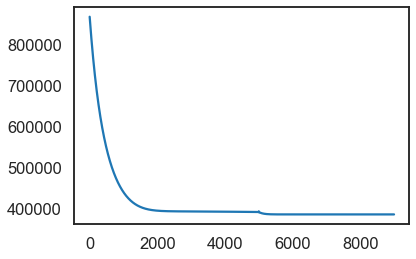

In [181]:
plt.plot(losses_m[1000:])

## check prediction

In [177]:
z_v = model_v.most_likely_states(data_v)
x_predict_arr_v = k_step_prediction(model_v, z_v, data_v)

z_m = model_m.most_likely_states(data_m)
x_predict_arr_m = k_step_prediction(model_m, z_m, data_m)


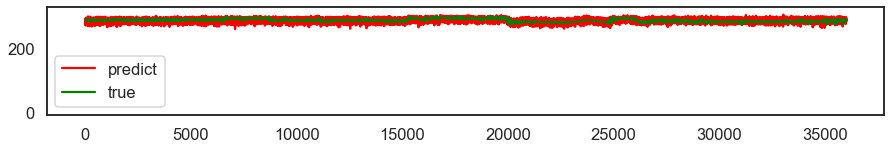

In [189]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr_v[:,0], label='predict', color='red')
plt.plot(data_v[:,0].numpy(), label='true', color='green')
plt.ylim(-10, arena_xmax+10)
plt.legend()

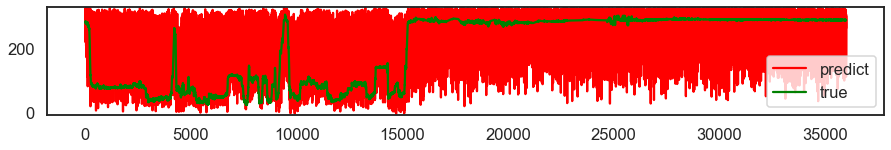

In [179]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr_m[:,0], label='predict', color='red')
plt.plot(data_m[:,0].numpy(), label='true', color='green')
plt.ylim(-10, arena_xmax+10)
plt.legend()

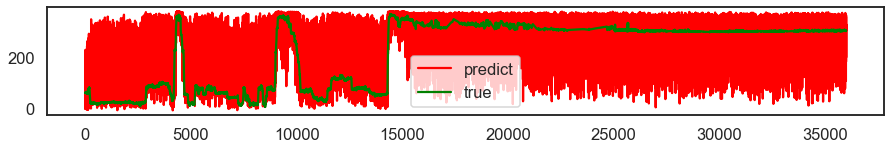

In [180]:
plt.figure(figsize=(15,2))
plt.plot(x_predict_arr_m[:,1], label='predict', color='red')
plt.plot(data_m[:,1].numpy(), label='true', color='green')
plt.legend()

In [186]:
sample_z_v, sample_x_v = model_v.sample(100)

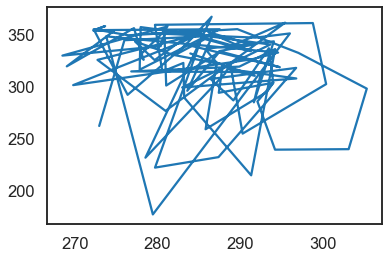

In [187]:
plt.plot(sample_x_v[:,0], sample_x_v[:,1])